In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

# Intro Numpy

In [2]:
# 1d array
a= np.array([1,2,3])
b = np.array([2,3,4])

print(a.ndim)
print(a.size)
print(a.shape)

1
3
(3,)


In [3]:
# 2d arrays
a = np.array([[1,2,3],[3,4,5]])
b = np.array([[2,3,4],[9,2,1]])
a*b

array([[ 2,  6, 12],
       [27,  8,  5]])

In [4]:
# a vertcal array
f = np.array([[1],[2],[3]])
f

array([[1],
       [2],
       [3]])

In [5]:
np.append(a,b)

array([1, 2, 3, 3, 4, 5, 2, 3, 4, 9, 2, 1])

In [6]:
# adding an array vertically
v = np.array([[1,2,3,4],[5,6,7,8]])
g = np.array([8,9,0,1])

v = np.vstack((v,g))
v


array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [8, 9, 0, 1]])

In [7]:
# adding an array horizontally
v = np.array([[1,2,3,4],[5,6,7,8]])
g = np.array([[8],[1]])

v = np.hstack((v,g))
v

array([[1, 2, 3, 4, 8],
       [5, 6, 7, 8, 1]])

In [8]:
# flattening an arrain
d = v.flatten()
d

array([1, 2, 3, 4, 8, 5, 6, 7, 8, 1])

In [9]:
# Take sum row wise using axis = 0
print(a)
print('Vertically')
print(np.sum(a, axis = 0))
print('Horizontally')
np.sum(a, axis = 1)


[[1 2 3]
 [3 4 5]]
Vertically
[4 6 8]
Horizontally


array([ 6, 12])

# Univariate regression

## Read Data

In [10]:
data = pd.read_csv('Data/week_1-ex_1.txt', header=None)
data.columns = ['X','y']
data.head()

,X,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Preprocessing

In [33]:
X = data.X
y = data.y

X0 = np.ones(len(y))

theta = np.zeros((2))

X = np.vstack((X0, X))
X

array([[ 1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ],
       [ 6.110

## Regression

In [35]:
def regression(X, theta):
    return np.dot(X.T, theta)

In [36]:
regression(X, theta)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Cost Function

In [37]:
def cost_function(X, theta, y):
    return 1/(2*len(y)) * np.sum((regression(X, theta) - y)**2)

In [38]:
theta = np.array([-1.0,2.0])

cost_function(X, theta, y)

54.24245508201238

## Gradient Descent

In [41]:
def gradient_descent(X, y, theta, n_iters, lr):
    m = len(y)
    errors = []
    for i in range(n_iters):
        
        y_hat = regression(X, theta)
        error = cost_function(X, theta, y)
        errors.append(error)
        delta = (np.dot((y_hat-y),X.T)/m)*lr
        theta -= delta

    return theta, errors

In [42]:
n_iters = 1500
lr = 0.01

theta, errors = gradient_descent(X = X, y = y, theta = theta, n_iters = n_iters, lr = lr)

theta

array([-3.70968912,  1.17433871])

In [43]:
ypred = regression(X,theta)

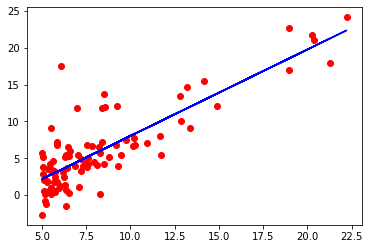

In [44]:
plt.plot(X[1],ypred,markersize = 10,color = 'b',label = 'Predicted')
plt.scatter(X[1],y,color = 'r',label = 'Actual')
plt.show()

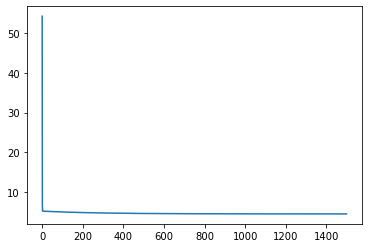

In [45]:
plt.plot(errors)

# Multivariate Regression

## Read and Preprocess

In [46]:
data = pd.read_csv('Data/week_2-ex_1.txt', header=None)
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [47]:
def normalize_data(X):
    X_mean =np.mean(X, axis = 0)
    X_std = np.std(X, axis = 0)
    z = (X-X_mean)/X_std

    return z

In [48]:
X = data[[0, 1]].values
y = data[2].values

X_norm = normalize_data(X)
X0 = np.ones((len(y),1))

X = np.hstack((X0, X_norm))

theta = np.zeros(X.shape[1])

## Regression

In [49]:
def regression(X, theta):
    return np.dot(X, theta)

In [50]:
regression(X, theta)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [52]:
def gradient_descent(X, y, theta, n_iters, lr):
    m = len(y)
    errors = []
    for i in range(n_iters):
        
        y_hat = regression(X, theta)
        error = cost_function(X, theta, y)
        errors.append(error)
        delta = (np.dot((y_hat-y),X)/m)*lr
        theta -= delta

    return theta, errors

In [53]:
cost_function(X, theta, y)

65591548106.45744

In [54]:
theta, errors = gradient_descent(X, y, theta, n_iters, lr)

In [55]:
theta

array([340412.56301439, 109370.05670466,  -6500.61509507])

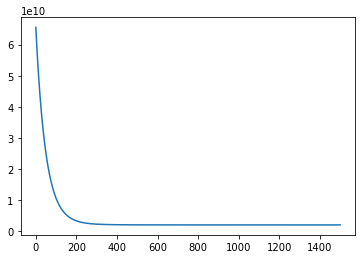

In [56]:
plt.plot(errors)

## Evaluation

In [57]:

def r2_score(y,ypred):
    ymean = np.mean(y)
    num = np.sum((y.T - ypred)**2)
    den = np.sum((y.T - ymean)**2)
    output = 1-num/den
    return output

In [58]:
r2_score(y,regression(X, theta))

0.7329446704567323

In [59]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

lr.score(X,y)

0.7329450180289143

# Normal Equations

In [60]:
inv = np.linalg.inv(X.T@X)
Multi = X.T@y
theta = inv@Multi
theta

array([340412.65957447, 109447.79646964,  -6578.35485416])

In [62]:
y_pred = regression(X, theta)

In [65]:
len(y_pred)

47

In [66]:
r2_score(y, y_pred)

0.7329450180289142